In [49]:
import pandas as pd

df = pd.read_json('nba_posts.jsonl', lines=True)
df.head()



,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,media_metadata,whitelist_status,parent_whitelist_status
0,NaN,nba,,t2_2ip9m,False,NaN,0,False,[Highlight] Here are some of Nikola Jokić’s be...,[],...,https://v.redd.it/tc5oglvpg43e1,13830856,1732572981,0,None,True,NaN,NaN,NaN,NaN
1,NaN,nba,,t2_2ip9m,False,NaN,0,False,[Highlight] Here are some of Nikola Jokić’s be...,"[{'e': 'text', 't': 'Highlight'}]",...,https://v.redd.it/cjgmgqphf43e1,13830786,1732572602,0,"{'reddit_video': {'bitrate_kbps': 5000, 'fallb...",True,11e1d3fc-5c54-11e4-8ccc-12313b0e448d,NaN,NaN,NaN
2,NaN,nba,,t2_2ip9m,False,NaN,0,False,[All-Access] A view from the Philadelphia crow...,"[{'e': 'text', 't': 'All-Access'}]",...,https://v.redd.it/30wdv8fgck2e1,13794197,1732329316,0,"{'reddit_video': {'bitrate_kbps': 2400, 'fallb...",True,d68cbfa6-5c53-11e4-acab-12313b0e448d,NaN,NaN,NaN
3,NaN,nba,,t2_2ip9m,False,NaN,0,False,"[Highlight] On this day in NBA History, Kobe B...",[],...,https://v.redd.it/qan645ecsh2e1,13789482,1732298374,0,"{'reddit_video': {'bitrate_kbps': 5000, 'fallb...",True,NaN,NaN,NaN,NaN
4,NaN,nba,\n,t2_2ip9m,False,NaN,0,False,[Highlight] All 22 3’s from the Boston Celtics...,[],...,https://v.redd.it/jnxbidmsdz1e1,13761970,1732075659,0,None,True,NaN,NaN,NaN,NaN


In [50]:
print(df.author.value_counts().sort_values(ascending=False).head(1000).to_markdown())


| author   |   count |
|:---------|--------:|
| nba      |     111 |


C:\Users\kkhitalishvili\AppData\Local\Temp\ipykernel_30288\3026139802.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week_start'] = df['created_date'].dt.to_period('W').apply(lambda r: r.start_time)


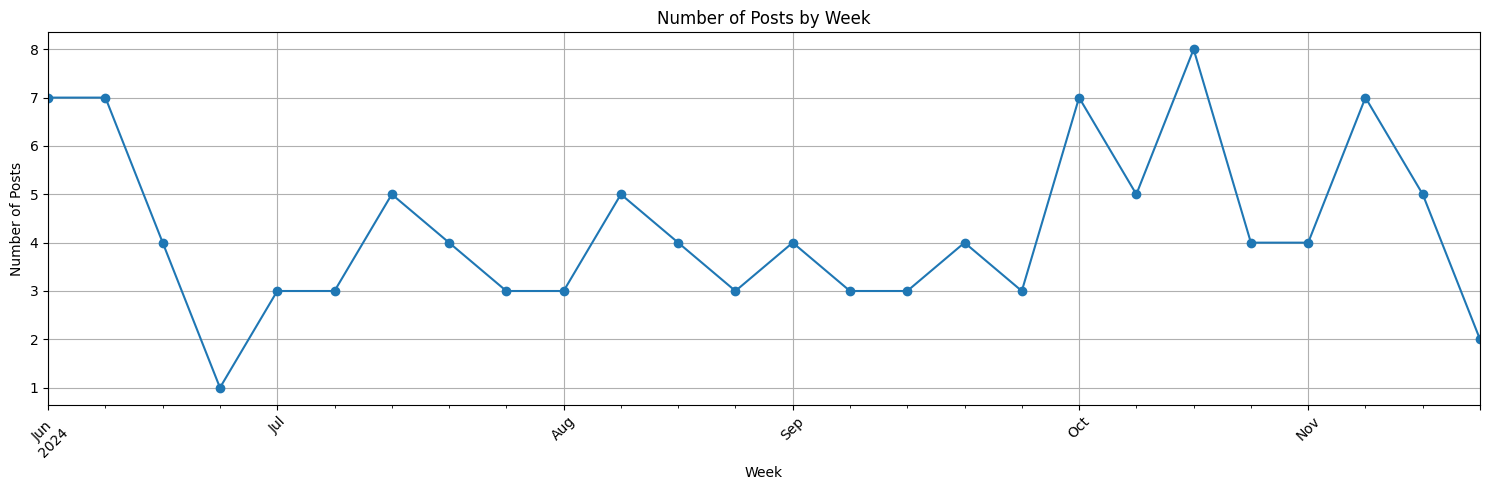


Weekly Post Counts:
| week_start          |   0 |
|:--------------------|----:|
| 2024-06-03 00:00:00 |   7 |
| 2024-06-10 00:00:00 |   7 |
| 2024-06-17 00:00:00 |   4 |
| 2024-06-24 00:00:00 |   1 |
| 2024-07-01 00:00:00 |   3 |
| 2024-07-08 00:00:00 |   3 |
| 2024-07-15 00:00:00 |   5 |
| 2024-07-22 00:00:00 |   4 |
| 2024-07-29 00:00:00 |   3 |
| 2024-08-05 00:00:00 |   3 |
| 2024-08-12 00:00:00 |   5 |
| 2024-08-19 00:00:00 |   4 |
| 2024-08-26 00:00:00 |   3 |
| 2024-09-02 00:00:00 |   4 |
| 2024-09-09 00:00:00 |   3 |
| 2024-09-16 00:00:00 |   3 |
| 2024-09-23 00:00:00 |   4 |
| 2024-09-30 00:00:00 |   3 |
| 2024-10-07 00:00:00 |   7 |
| 2024-10-14 00:00:00 |   5 |
| 2024-10-21 00:00:00 |   8 |
| 2024-10-28 00:00:00 |   4 |
| 2024-11-04 00:00:00 |   4 |
| 2024-11-11 00:00:00 |   7 |
| 2024-11-18 00:00:00 |   5 |
| 2024-11-25 00:00:00 |   2 |


In [51]:
# Convert created_utc to datetime and group by week
df['created_date'] = pd.to_datetime(df['created_utc'], unit='s').dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df['week_start'] = df['created_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_counts = df.groupby('week_start').size()

# Plot weekly post counts
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
weekly_counts.plot(kind='line', marker='o')
plt.title('Number of Posts by Week')
plt.xlabel('Week')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the counts as a table
print("\nWeekly Post Counts:")
print(weekly_counts.to_markdown())


In [52]:

weekly_data = df[df['created_date'].dt.date.between(pd.to_datetime('2024-06-24').date(), pd.to_datetime('2024-06-30').date())]

print(weekly_data[['title', 'created_date', 'score', 'num_comments']].to_markdown())


# Show summary statistics
print(f"\nTotal submissions: {len(weekly_data)}")
print(f"Average score: {weekly_data['score'].mean():.1f}")
print(f"Average comments: {weekly_data['num_comments'].mean():.1f}")
weekly_data.head()
weekly_data[weekly_data['week_start'] == '2024-06-25']
weekly_data.columns.tolist()


|    | title                                                                                                         | created_date              |   score |   num_comments |
|---:|:--------------------------------------------------------------------------------------------------------------|:--------------------------|--------:|---------------:|
| 92 | Zaccharie Risacher is selected 1st overall by the Atlanta Hawks in the 2024 NBA Draft Presented by State Farm | 2024-06-26 20:24:16-04:00 |     294 |             45 |

Total submissions: 1
Average score: 294.0
Average comments: 45.0


['approved_at_utc',
 'subreddit',
 'selftext',
 'author_fullname',
 'saved',
 'mod_reason_title',
 'gilded',
 'clicked',
 'title',
 'link_flair_richtext',
 'subreddit_name_prefixed',
 'hidden',
 'pwls',
 'link_flair_css_class',
 'downs',
 'thumbnail_height',
 'top_awarded_type',
 'hide_score',
 'name',
 'quarantine',
 'link_flair_text_color',
 'upvote_ratio',
 'author_flair_background_color',
 'subreddit_type',
 'ups',
 'total_awards_received',
 'media_embed',
 'thumbnail_width',
 'author_flair_template_id',
 'is_original_content',
 'user_reports',
 'secure_media',
 'is_reddit_media_domain',
 'is_meta',
 'category',
 'secure_media_embed',
 'link_flair_text',
 'can_mod_post',
 'score',
 'approved_by',
 'is_created_from_ads_ui',
 'author_premium',
 'thumbnail',
 'edited',
 'author_flair_css_class',
 'author_flair_richtext',
 'gildings',
 'post_hint',
 'content_categories',
 'is_self',
 'mod_note',
 'created',
 'link_flair_type',
 'wls',
 'removed_by_category',
 'banned_by',
 'author_flai

In [ ]:
import requests
from datetime import datetime
from typing import List, Dict, Union, Optional, Iterator
import time
from tqdm import tqdm
import json
import praw

class PullPushAPI:
    """A wrapper for the pullpush.io Reddit API"""
    
    def __init__(self, base_url: str = "https://api.pullpush.io/reddit"):
        self.base_url = base_url
        self.max_retries = 3
        self.retry_delay = 5  # seconds
        
        # Initialize PRAW
        self.reddit = praw.Reddit(
            client_id="mRiK8qNpp5t70w",
            client_secret="TJPlrL8aOhbQpBagmnjPEdTzARk", 
            user_agent="Comment Extraction (by u/dostre)"
        )
        
    def _make_request(self, endpoint: str, params: Dict) -> Dict:
        """Make HTTP request with retry logic"""
        for attempt in range(self.max_retries):
            try:
                response = requests.get(f"{self.base_url}/{endpoint}", params=params)
                response.raise_for_status()
                return response.json()
            except requests.exceptions.RequestException as e:
                if attempt == self.max_retries - 1:
                    raise e
                print(f"Attempt {attempt + 1} failed. Retrying in {self.retry_delay} seconds...")
                time.sleep(self.retry_delay)
                continue

    def iter_submissions(
        self,
        subreddit: str,
        output_file: Optional[str] = None,
        query: Optional[str] = None,
        title: Optional[str] = None,
        author: Optional[str] = None,
        sort: str = "desc",
        sort_type: str = "created_utc",
        min_score: Optional[int] = None,
        before: Optional[Union[int, datetime]] = None,
        after: Optional[Union[int, datetime]] = None,
        batch_size: int = 100,
    ) -> Iterator[Dict]:
        """
        Iterator that yields all submissions matching the criteria.
        Uses pagination to handle the 100-item limit per request.
        """
        params = {
            "html_decode": "true",
            "subreddit": subreddit,
            "size": min(batch_size, 100),
            "sort": sort,
            "sort_type": sort_type,
        }
        
        # Add optional parameters
        if query:
            params["q"] = query
        if title:
            params["title"] = f'"{title}"'
        if author:
            params["author"] = author
        if min_score is not None:
            params["score"] = f">{min_score}"
            
        # Convert datetime objects to timestamps
        current_before = before
        if isinstance(current_before, datetime):
            current_before = int(current_before.timestamp())
            
        current_after = after
        if isinstance(current_after, datetime):
            current_after = int(current_after.timestamp())
            
        pbar = tqdm()
        while True:
            # Update time bounds, ensuring integers
            if current_before is not None:
                params["before"] = int(current_before)
            if current_after is not None:
                params["since"] = int(current_after)
                
            # Make request
            response = self._make_request("submission/search", params)
            submissions = response.get("data", [])
            
            if not submissions:
                break
                
            # Yield submissions and save to file if specified
            for submission in submissions:
                # Get additional data from PRAW
                try:
                    praw_submission = self.reddit.submission(submission['id'])
                    submission['score'] = praw_submission.score
                    submission['num_comments'] = praw_submission.num_comments
                except Exception as e:
                    print(f"Error getting PRAW data for submission {submission['id']}: {e}")
                
                pbar.update(1)
                if output_file:
                    with open(output_file, 'a') as f:
                        f.write(json.dumps(submission) + '\n')
                yield submission
                
            # Update the time bound for the next request
            if sort == "desc":
                # When sorting by descending order, use the oldest post's timestamp
                current_before = int(min(sub["created_utc"] for sub in submissions))
            else:
                # When sorting by ascending order, use the newest post's timestamp
                current_after = int(max(sub["created_utc"] for sub in submissions))
                
            # Add small offset to avoid duplicates
            if sort == "desc":
                current_before = current_before - 1
            else:
                current_after = current_after + 1
                
            # Sleep briefly to avoid hitting rate limits
            time.sleep(0.5)
        pbar.close()

    def get_all_submissions(
        self,
        subreddit: str,
        output_file: Optional[str] = None,
        **kwargs
    ) -> List[Dict]:
        """
        Helper method to collect all submissions into a list.
        
        Args:
            subreddit: Subreddit name
            output_file: Optional file path to save submissions as JSON Lines
            **kwargs: Additional arguments to pass to iter_submissions
            
        Returns:
            List of all submission dictionaries
        """
        return list(self.iter_submissions(subreddit=subreddit, output_file=output_file, **kwargs))

# Initialize the API
api = PullPushAPI()

# Method 2: Get all submissions at once
all_posts = api.get_all_submissions(
    subreddit="nba",
    # min_score=2,
    author="nba",
    after=datetime(2024, 1, 1),
    before=datetime(2024, 12, 31),
    output_file="nba_posts.jsonl"
)
print(f"Retrieved {len(all_posts)} submissions")